In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

In [2]:
###############################################################
# CHARGE ATMOS variables
###############################################################

#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
acc_t = 1440 #minutes
ini_date_idx=0
#end_date_idx=0

###load data###
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

#hist
print('Charging Ant hist...')
wrflist_oh = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))

# Get surface variables
t2_ant_hist = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] - 273.15
q2_ant_hist = wrf.getvar(wrflist_oh, 'Q2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
psl_ant_hist = wrf.getvar(wrflist_oh, 'PSFC', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] / 100
sic_ant_hist = wrf.getvar(wrflist_oh, 'SEAICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
sstsk_ant_hist = wrf.getvar(wrflist_oh, 'SSTSK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
u10_ant_hist = wrf.getvar(wrflist_oh, 'U10', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
v10_ant_hist = wrf.getvar(wrflist_oh, 'V10', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
    
# Extract the pressure, geopotential height, and wind variables
Ppertubation_ant_hist = wrf.getvar(wrflist_oh, 'P', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PB_ant_hist = wrf.getvar(wrflist_oh, 'PB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
P_ant_hist = (Ppertubation_ant_hist + PB_ant_hist)

PHperturbation_ant_hist = wrf.getvar(wrflist_oh, 'PH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PHB_ant_hist = wrf.getvar(wrflist_oh, 'PHB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
Z_ant_hist = (PHperturbation_ant_hist + PHB_ant_hist)/9.8
Z_ant_hist_unstg = wrf.destagger(Z_ant_hist, stagger_dim=1)

PT_ant_hist = wrf.getvar(wrflist_oh, 'T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:] + 270
T_ant_hist = PT_ant_hist * (P_ant_hist/100000)**0.286

U_ant_hist = wrf.getvar(wrflist_oh, 'U', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
V_ant_hist = wrf.getvar(wrflist_oh, 'V', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
#Wind_ant_hist = np.squrt(U_ant_hist**2 + V_ant_hist**2)

# Get plt variables
qvapor_ant_hist = wrf.getvar(wrflist_oh, 'QVAPOR', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qcloud_ant_hist = wrf.getvar(wrflist_oh, 'QCLOUD', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_hist = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qrain_ant_hist = wrf.getvar(wrflist_oh, 'QRAIN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qsnow_ant_hist = wrf.getvar(wrflist_oh, 'QSNOW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_hist = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]

pw_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qvapor_ant_hist, Z_ant_hist, meta=True)
lwp_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qcloud_ant_hist, Z_ant_hist, meta=True)
iwp_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qice_ant_hist, Z_ant_hist, meta=True)


######################
# ANT COORDINATES
# Get surface fix variables
height = wrf.getvar(wrflist_oh, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(t2_ant_hist)
times = wrf.extract_times(wrflist_oh, timeidx=wrf.ALL_TIMES)

Charging Ant hist...
Total: 59


In [3]:
U_ant_hist = wrf.getvar(wrflist_oh, 'U', timeidx=wrf.ALL_TIMES)[ini_date_idx:,25,:,:-1]
V_ant_hist = wrf.getvar(wrflist_oh, 'V', timeidx=wrf.ALL_TIMES)[ini_date_idx:,25,:-1,:]

In [5]:
#Positions
CON_xy = wrf.ll_to_xy(wrflist_oh, -75.09978, 123.332196) #Concordia
CON_ll = wrf.xy_to_ll(wrflist_oh, CON_xy[0], CON_xy[1])

#Time stamps
t_1 = np.where(times == np.datetime64('2022-03-15T00'))[0][0]
t_2 = np.where(times == np.datetime64('2022-03-18T00'))[0][0]
t_3 = np.where(times == np.datetime64('2022-03-20T00'))[0][0]
t_4 = np.where(times == np.datetime64('2022-03-23T00'))[0][0]

/tmp/ipykernel_118152/1763542848.py:48: RuntimeWarning: overflow encountered in square
  speed_wind = np.sqrt(u10_wind**2 + v10_wind**2)
/tmp/ipykernel_118152/1763542848.py:49: RuntimeWarning: invalid value encountered in divide
  lw = 15 * speed_wind / speed_wind.max()


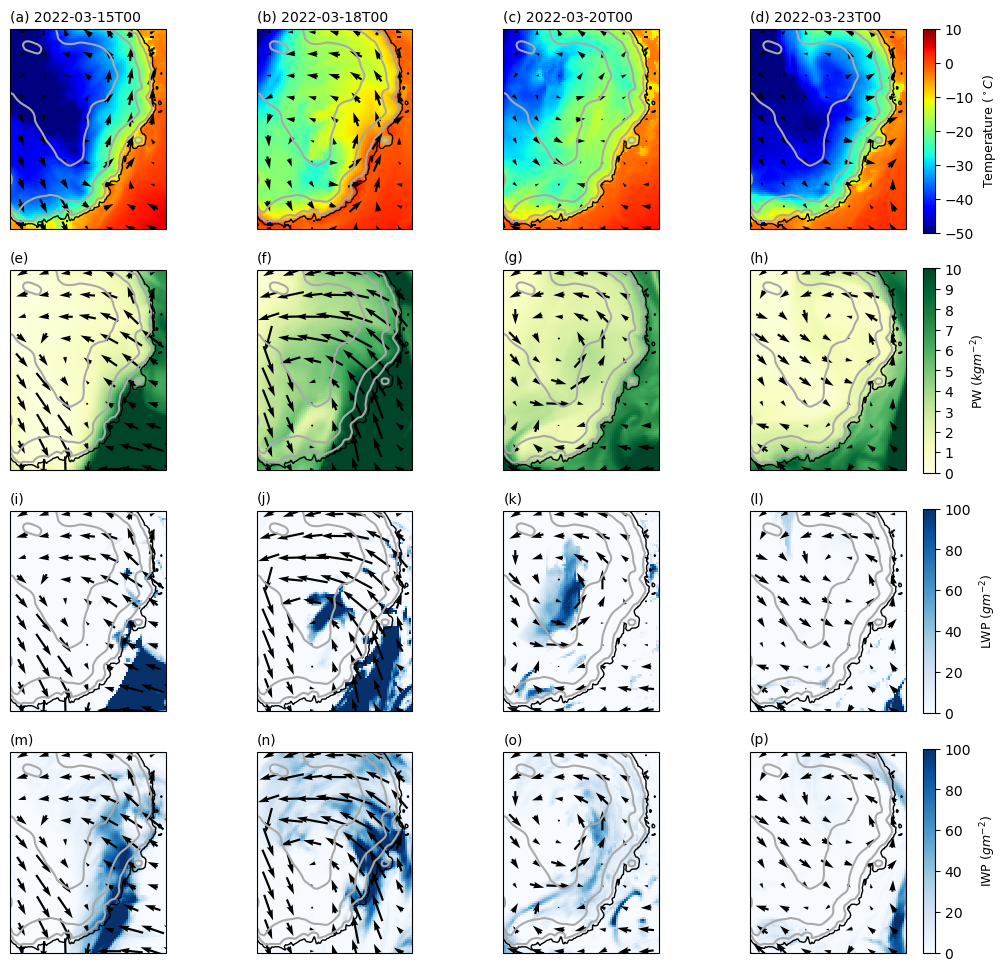

In [7]:
#############################################
# Plot terrein map
#############################################

min_height = 10
#time_ini = 39
time_ix_ = 0
  
####################
### Plot DRIVERS ###
#Figure and axis
fig = plt.figure(figsize=[12,12])
spec = gridspec.GridSpec(ncols=4, nrows=4, figure=fig, hspace= 0.2, wspace=0.3)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1], projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(spec[0, 2], projection=ccrs.SouthPolarStereo())
ax4 = fig.add_subplot(spec[0, 3], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax6 = fig.add_subplot(spec[1, 1], projection=ccrs.SouthPolarStereo())
ax7 = fig.add_subplot(spec[1, 2], projection=ccrs.SouthPolarStereo())
ax8 = fig.add_subplot(spec[1, 3], projection=ccrs.SouthPolarStereo())
ax9 = fig.add_subplot(spec[2, 0], projection=ccrs.SouthPolarStereo())
ax10 = fig.add_subplot(spec[2, 1], projection=ccrs.SouthPolarStereo())
ax11 = fig.add_subplot(spec[2, 2], projection=ccrs.SouthPolarStereo())
ax12 = fig.add_subplot(spec[2, 3], projection=ccrs.SouthPolarStereo())
ax13 = fig.add_subplot(spec[3, 0], projection=ccrs.SouthPolarStereo())
ax14 = fig.add_subplot(spec[3, 1], projection=ccrs.SouthPolarStereo())
ax15 = fig.add_subplot(spec[3, 2], projection=ccrs.SouthPolarStereo())
ax16 = fig.add_subplot(spec[3, 3], projection=ccrs.SouthPolarStereo())

################################
### Plot Temperature and wind
### Temperature
CS1 = ax1.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(t2_ant_hist[t_1,:,:]), cmap="jet", vmin=-50, vmax=10, transform=ccrs.PlateCarree(), shading="auto")
CS2 = ax2.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(t2_ant_hist[t_2,:,:]), cmap="jet", vmin=-50, vmax=10, transform=ccrs.PlateCarree(), shading="auto")
CS3 = ax3.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(t2_ant_hist[t_3,:,:]), cmap="jet", vmin=-50, vmax=10, transform=ccrs.PlateCarree(), shading="auto")
CS4 = ax4.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(t2_ant_hist[t_4,:,:]), cmap="jet", vmin=-50, vmax=10, transform=ccrs.PlateCarree(), shading="auto")

## Wind
jump = 8
uv = wrf.uvmet(u10_ant_hist, v10_ant_hist, lats, lons, cen_long=0, cone=1)   # shape (2, y, x) rotate
lons_wind = wrf.to_np(lons[::jump,::jump])
lats_wind = wrf.to_np(lats[::jump,::jump])
u10_wind = wrf.to_np(uv[0,:,::jump,::jump])
v10_wind = wrf.to_np(uv[1,:,::jump,::jump])
speed_wind = np.sqrt(u10_wind**2 + v10_wind**2)
lw = 15 * speed_wind / speed_wind.max()

Q1 = ax1.quiver(lons_wind, lats_wind, u10_wind[t_1], v10_wind[t_1], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q2 = ax2.quiver(lons_wind, lats_wind, u10_wind[t_2], v10_wind[t_2], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q3 = ax3.quiver(lons_wind, lats_wind, u10_wind[t_3], v10_wind[t_3], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q4 = ax4.quiver(lons_wind, lats_wind, u10_wind[t_4], v10_wind[t_4], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)

################################
### Plot PW and wind
### Temperature
CS5 = ax5.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(pw_ant_hist[t_1,:,:]), cmap="YlGn", vmin=0, vmax=10, transform=ccrs.PlateCarree(), shading="auto")
CS6 = ax6.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(pw_ant_hist[t_2,:,:]), cmap="YlGn", vmin=0, vmax=10, transform=ccrs.PlateCarree(), shading="auto")
CS7 = ax7.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(pw_ant_hist[t_3,:,:]), cmap="YlGn", vmin=0, vmax=10, transform=ccrs.PlateCarree(), shading="auto")
CS8 = ax8.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(pw_ant_hist[t_4,:,:]), cmap="YlGn", vmin=0, vmax=10, transform=ccrs.PlateCarree(), shading="auto")

## Wind
jump = 8
sig_lev = 25
uv = wrf.uvmet(U_ant_hist, V_ant_hist, lats, lons, cen_long=0, cone=1)   # shape (2, y, x) rotate
lons_wind = wrf.to_np(lons[::jump,::jump])
lats_wind = wrf.to_np(lats[::jump,::jump])
u10_wind = wrf.to_np(uv[0,:,::jump,::jump])
v10_wind = wrf.to_np(uv[1,:,::jump,::jump])
speed_wind = np.sqrt(u10_wind**2 + v10_wind**2)
lw = 15 * speed_wind / speed_wind.max()

Q5 = ax5.quiver(lons_wind, lats_wind, u10_wind[t_1], v10_wind[t_1], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q6 = ax6.quiver(lons_wind, lats_wind, u10_wind[t_2], v10_wind[t_2], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q7 = ax7.quiver(lons_wind, lats_wind, u10_wind[t_3], v10_wind[t_3], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q8 = ax8.quiver(lons_wind, lats_wind, u10_wind[t_4], v10_wind[t_4], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)


################################
### Plot LWP and wind
### Temperature
CS9 = ax9.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(lwp_ant_hist[t_1,:,:])*1000, cmap="Blues", vmin=0, vmax=100, transform=ccrs.PlateCarree(), shading="auto")
CS10 = ax10.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(lwp_ant_hist[t_2,:,:])*1000, cmap="Blues", vmin=0, vmax=100, transform=ccrs.PlateCarree(), shading="auto")
CS11 = ax11.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(lwp_ant_hist[t_3,:,:])*1000, cmap="Blues", vmin=0, vmax=100, transform=ccrs.PlateCarree(), shading="auto")
CS12 = ax12.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(lwp_ant_hist[t_4,:,:])*1000, cmap="Blues", vmin=0, vmax=100, transform=ccrs.PlateCarree(), shading="auto")

## Wind
jump = 8
sig_lev = 25
uv = wrf.uvmet(U_ant_hist, V_ant_hist, lats, lons, cen_long=0, cone=1)   # shape (2, y, x) rotate
lons_wind = wrf.to_np(lons[::jump,::jump])
lats_wind = wrf.to_np(lats[::jump,::jump])
u10_wind = wrf.to_np(uv[0,:,::jump,::jump])
v10_wind = wrf.to_np(uv[1,:,::jump,::jump])
speed_wind = np.sqrt(u10_wind**2 + v10_wind**2)
lw = 15 * speed_wind / speed_wind.max()

Q9 = ax9.quiver(lons_wind, lats_wind, u10_wind[t_1], v10_wind[t_1], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q10 = ax10.quiver(lons_wind, lats_wind, u10_wind[t_2], v10_wind[t_2], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q11 = ax11.quiver(lons_wind, lats_wind, u10_wind[t_3], v10_wind[t_3], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q12 = ax12.quiver(lons_wind, lats_wind, u10_wind[t_4], v10_wind[t_4], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)


################################
### Plot IWP and wind
### Temperature
CS13 = ax13.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(iwp_ant_hist[t_1,:,:])*1000, cmap="Blues", vmin=0, vmax=100, transform=ccrs.PlateCarree(), shading="auto")
CS14 = ax14.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(iwp_ant_hist[t_2,:,:])*1000, cmap="Blues", vmin=0, vmax=100, transform=ccrs.PlateCarree(), shading="auto")
CS15 = ax15.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(iwp_ant_hist[t_3,:,:])*1000, cmap="Blues", vmin=0, vmax=100, transform=ccrs.PlateCarree(), shading="auto")
CS16 = ax16.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(iwp_ant_hist[t_4,:,:])*1000, cmap="Blues", vmin=0, vmax=100, transform=ccrs.PlateCarree(), shading="auto")

## Wind
jump = 8
sig_lev = 25
uv = wrf.uvmet(U_ant_hist, V_ant_hist, lats, lons, cen_long=0, cone=1)   # shape (2, y, x) rotate
lons_wind = wrf.to_np(lons[::jump,::jump])
lats_wind = wrf.to_np(lats[::jump,::jump])
u10_wind = wrf.to_np(uv[0,:,::jump,::jump])
v10_wind = wrf.to_np(uv[1,:,::jump,::jump])
speed_wind = np.sqrt(u10_wind**2 + v10_wind**2)
lw = 15 * speed_wind / speed_wind.max()

Q13 = ax13.quiver(lons_wind, lats_wind, u10_wind[t_1], v10_wind[t_1], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q14 = ax14.quiver(lons_wind, lats_wind, u10_wind[t_2], v10_wind[t_2], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q15 = ax15.quiver(lons_wind, lats_wind, u10_wind[t_3], v10_wind[t_3], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)
Q16 = ax16.quiver(lons_wind, lats_wind, u10_wind[t_4], v10_wind[t_4], transform=ccrs.PlateCarree(), pivot='middle', scale=150, regrid_shape=22, width=0.014)


##########################
## Plot parameters maps ##
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]:
    #ax.contour(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(height), np.arange(10,10000,9000), cmap="gray", extend="both", transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.contour(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(height), np.arange(1000,8000,1000), colors="DarkGray", extend="both", transform=ccrs.PlateCarree())
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
    #ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())
    lon_min, lon_max = 80, 142
    lat_min, lat_max = -80, -65
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

#Title
ax1.set_title('(a) ' + str(times[t_1])[:-16], loc='left', fontsize=10)
ax2.set_title('(b) ' + str(times[t_2])[:-16], loc='left', fontsize=10)
ax3.set_title('(c) ' + str(times[t_3])[:-16], loc='left', fontsize=10)
ax4.set_title('(d) ' + str(times[t_4])[:-16], loc='left', fontsize=10)
ax5.set_title('(e)', loc='left', fontsize=10)
ax6.set_title('(f)', loc='left', fontsize=10)
ax7.set_title('(g)', loc='left', fontsize=10)
ax8.set_title('(h)', loc='left', fontsize=10)
ax9.set_title('(i)', loc='left', fontsize=10)
ax10.set_title('(j)', loc='left', fontsize=10)
ax11.set_title('(k)', loc='left', fontsize=10)
ax12.set_title('(l)', loc='left', fontsize=10)
ax13.set_title('(m)', loc='left', fontsize=10)
ax14.set_title('(n)', loc='left', fontsize=10)
ax15.set_title('(o)', loc='left', fontsize=10)
ax16.set_title('(p)', loc='left', fontsize=10)

#Cbars
cbar_ax1 = fig.add_axes([0.90, 0.71, 0.01, 0.17])
cbar_ax5 = fig.add_axes([0.90, 0.51, 0.01, 0.17])
cbar_ax9 = fig.add_axes([0.90, 0.31, 0.01, 0.17])
cbar_ax13 = fig.add_axes([0.90, 0.11, 0.01, 0.17])
cbar1 = fig.colorbar(CS1, ticks=np.arange(-50,10.1,10), cax=cbar_ax1)
cbar5 = fig.colorbar(CS5, ticks=np.arange(0,10.1,1), cax=cbar_ax5)
cbar9 = fig.colorbar(CS9, ticks=np.arange(0,150.1,20), cax=cbar_ax9)
cbar13 = fig.colorbar(CS13, ticks=np.arange(0,150.1,20), cax=cbar_ax13)
cbar1.set_label('Temperature ($^\circ C$)', rotation=90, labelpad=5, fontsize=9)
cbar5.set_label('PW ($kg m^{-2}$)', rotation=90, labelpad=5, fontsize=9)
cbar9.set_label('LWP ($g m^{-2}$)', rotation=90, labelpad=5, fontsize=9)
cbar13.set_label('IWP ($g m^{-2}$)', rotation=90, labelpad=5, fontsize=9)